In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df = df.drop(['PassengerId','Name','Ticket'],axis=1)
df['Cabin'] = df['Cabin'].notna().astype(int)
df['Age'] = df['Age'].fillna(np.mean(df['Age']))


In [5]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.head(
)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,0,S
1,1,1,female,38.0,1,0,71.2833,1,C
2,1,3,female,26.0,0,0,7.9250,0,S
3,1,1,female,35.0,1,0,53.1000,1,S
4,0,3,male,35.0,0,0,8.0500,0,S


In [8]:
X = df.drop(['Survived'],axis=1)
X = pd.get_dummies(X,drop_first=True)
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2) 

In [9]:
cls = DecisionTreeClassifier(random_state=42)
path = cls.cost_complexity_pruning_path(X_train,y_train)

In [10]:
print(path)

{'ccp_alphas': array([0.00000000e+00, 6.69747505e-05, 8.92996674e-05, 1.11624584e-04,
       1.30600764e-04, 1.40646976e-04, 1.44077390e-04, 4.24173420e-04,
       4.68823254e-04, 4.68823254e-04, 5.02310629e-04, 6.82551502e-04,
       8.43881857e-04, 8.79043601e-04, 9.17696582e-04, 9.37646507e-04,
       9.37646507e-04, 9.82296341e-04, 1.01578372e-03, 1.05485232e-03,
       1.12517581e-03, 1.12517581e-03, 1.17205813e-03, 1.17599783e-03,
       1.18456009e-03, 1.19549930e-03, 1.23567893e-03, 1.23607054e-03,
       1.25880800e-03, 1.27860887e-03, 1.29827978e-03, 1.30649179e-03,
       1.34253932e-03, 1.35620579e-03, 1.37716831e-03, 1.39487798e-03,
       1.40646976e-03, 1.50023441e-03, 1.55200295e-03, 1.60771164e-03,
       1.87529301e-03, 1.87529301e-03, 1.92464283e-03, 2.01885612e-03,
       2.06751055e-03, 2.06833788e-03, 2.10970464e-03, 2.20943613e-03,
       2.23249168e-03, 2.26039783e-03, 2.30149597e-03, 2.31100043e-03,
       2.34411627e-03, 2.34411627e-03, 2.45159354e-03, 2.63770

In [11]:
ccp_alphas = path.ccp_alphas
cv_scores = []
for alpha in ccp_alphas:
    cls = DecisionTreeClassifier(random_state=0,ccp_alpha=alpha)
    cv_scores.append(np.mean(cross_val_score(cls,X_train,y_train,cv=10,scoring='accuracy')))

In [12]:
optimal_alpha = ccp_alphas[np.argmax(cv_scores)]
final_model = DecisionTreeClassifier(random_state=0,ccp_alpha=optimal_alpha,max_depth=4)
final_model.fit(X_train, y_train)
final_model.score(X_test,y_test)

0.8202247191011236

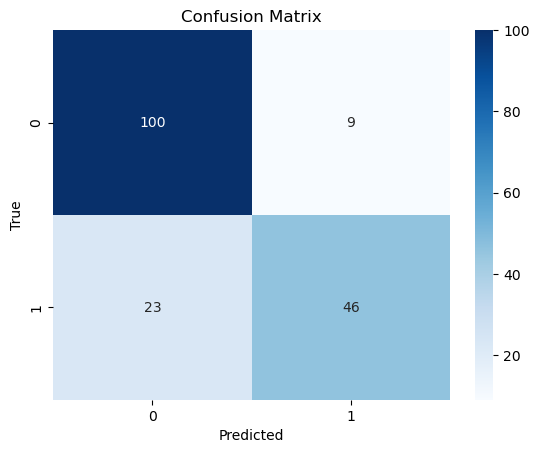

In [13]:
cm = confusion_matrix(y_test,final_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

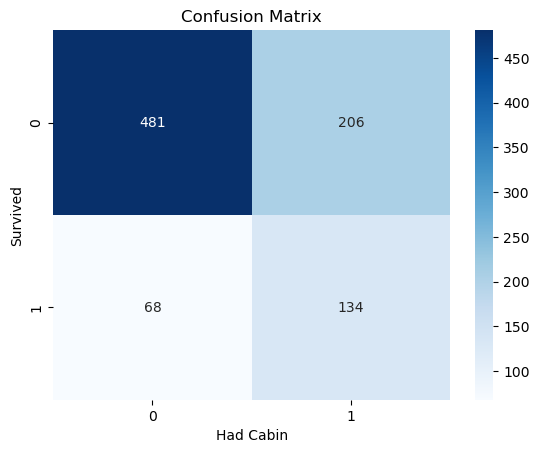

In [17]:
cm = confusion_matrix(X['Cabin'],y)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel("Had Cabin")
plt.ylabel("Survived")
plt.title("Confusion Matrix")
plt.show()